# Importaciones de Librerías

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.processing.constants import BASE_DIRECTORY
from typing import List

%matplotlib inline

# Funciones de ayuda

In [3]:
def get_epoch_from_line(line: str) -> int:
    '''
    This function gets an epoch from a line of the text.
    
    Parameters:
    line(str): The line of the text.
    
    Returns:
    int: The epoch.
    '''
    return int(line.split()[1].split('/')[0])

In [4]:
def get_training_loss_from_line(line: str) -> float:
    '''
    This function gets the training loss from a line.
    
    Parameters:
    line(str): The line of the text.
    
    Returns:
    float: The training loss.
    '''
    words = line.split()
    training_loss_str = words[11]
    return float(training_loss_str[:-1])

In [5]:
def get_validation_loss_from_line(line: str) -> float:
    '''
    This function gets the validation loss from a line.
    
    Parameters:
    line(str): The line of the text.
    
    Returns:
    float: The validation loss.
    '''
    words = line.split()
    validation_loss_str = words[4]
    return float(validation_loss_str[:-1])

In [7]:
def get_training_validation_loss(filename: str, epochs: int) -> (List, List):
    '''
    This function obtains, from a text file, the validation and training lost.
    
    Parameters:
    filename(str): The file where the training log of the chatbot is found.
    epochs(str): The amount of epochs that were used to train the chatbot.
    
    Returns:
    List, List:
    '''
    training_loss = [0] * epochs
    validation_loss = [0] * epochs
    with open(filename, 'r') as f: # Open the file with the training data
        # Iterate every line
        for line in f:
            if 'Training Loss:' in line: # Get training loss
                epoch = get_epoch_from_line(line) # Get epoch
                training_loss[epoch - 1] = get_training_loss_from_line(line) # Store loss in list
            elif 'Validation loss:' in line: # Get validation loss
                epoch = get_epoch_from_line(line) # Get epoch)
                validation_loss[epoch - 1] = get_validation_loss_from_line(line) # Store loss in list
            
    return training_loss, validation_loss    

# Resultados del entrenamiento del chatbot con textos de complejidad textual 1

## Obteniendo los datos

In [11]:
training_loss, validation_loss = get_training_validation_loss(f'{BASE_DIRECTORY}/data/raw/log.txt', 100)
losses = pd.DataFrame(data={
    'training': training_loss,
    'validation': validation_loss
})

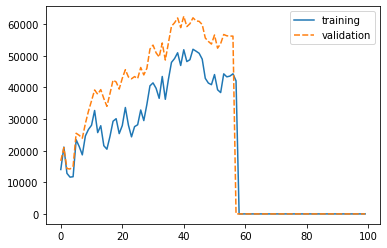

In [13]:
sns.lineplot(data=losses)
plt.show()